# **Global Data Breaches**
---
##**Description**
---
###This project will explore publicly repored data breaches globally.  The goal is to extract meaningful insights into where and how breaches most commonly occur.

- How many breaches every year?

- What industries experience the most data breaches?

- What methods are most commonly used to breach organizations?

- Which organizations suffered the largest breaches in terms of records exposed?
---


##**Dataset**
---
This project uses the **Data Breaches - A Comprehensive List** dataset from Kaggle:
[https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list](https://www.kaggle.com/datasets/thedevastator/data-breaches-a-comprehensive-list)

### Dataset Description:
This dataset contains a comprehensive list of global data breaches.  

It include the following columns:
- **Entity**: Name of the organization that was breached
- **Year**: Year the breach occurred
- **Records**: Number of records compromised
- **Organization type**: Sector of the organization
- **Method**: Method used to breach the organization
---


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df_1.csv to df_1.csv


In [1]:
import pandas as pd

df = pd.read_csv('df_1.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'df_1.csv'

In [ ]:
# inspect data

df.head()              # view top rows
df.info()              # get general info
#df.isnull().sum()      # check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         352 non-null    int64 
 1   Entity             352 non-null    object
 2   Year               352 non-null    object
 3   Records            350 non-null    object
 4   Organization type  352 non-null    object
 5   Method             351 non-null    object
 6   Sources            350 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.4+ KB


In [ ]:
# clean data

# Rename columns with _'s
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Drop rows with missing critical data
df.dropna(subset=['year', 'records', 'organization_type', 'method'], inplace=True)

# Convert 'records' to numeric (just in case there are commas or strings)
df['records'] = pd.to_numeric(df['records'], errors='coerce')

# Drop any rows where 'records' couldn't be converted
df.dropna(subset=['records'], inplace=True)

# remove rows with "unknown" as a datatype
df = df[df['organization_type'] != 'unknown']
df = df[df['method'] != 'unknown']
df = df[df['records'] != "unknown"]

# drop the sources column
# df.drop(columns=['sources'], inplace=True)

# drop the unnamed column
# df.drop(columns=['unnamed:_0'], inplace=True)

# check for non numeric values in the year and records columns
# ai code snippet -- I noticed some years said "2011 and 2014"
# and records that said "tens of thousands"
# Find rows where 'year' is not a valid number
invalid_years = df[~df['year'].apply(pd.to_numeric, errors='coerce').notnull()]
# Remove rows with invalid year values
df = df[pd.to_numeric(df['year'], errors='coerce').notnull()]
# Identify rows where 'records' has non-numeric entries
non_numeric_records = df[~df['records'].apply(pd.to_numeric, errors='coerce').notnull()]
# Drop rows with non-numeric 'records'
df = df[pd.to_numeric(df['records'], errors='coerce').notnull()]

# check columns
df.columns

# Check again after cleaning
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   unnamed:_0         297 non-null    int64  
 1   entity             297 non-null    object 
 2   year               297 non-null    object 
 3   records            297 non-null    float64
 4   organization_type  297 non-null    object 
 5   method             297 non-null    object 
 6   sources            295 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 18.6+ KB


##**Analysis**
---
###Breaches Over Time


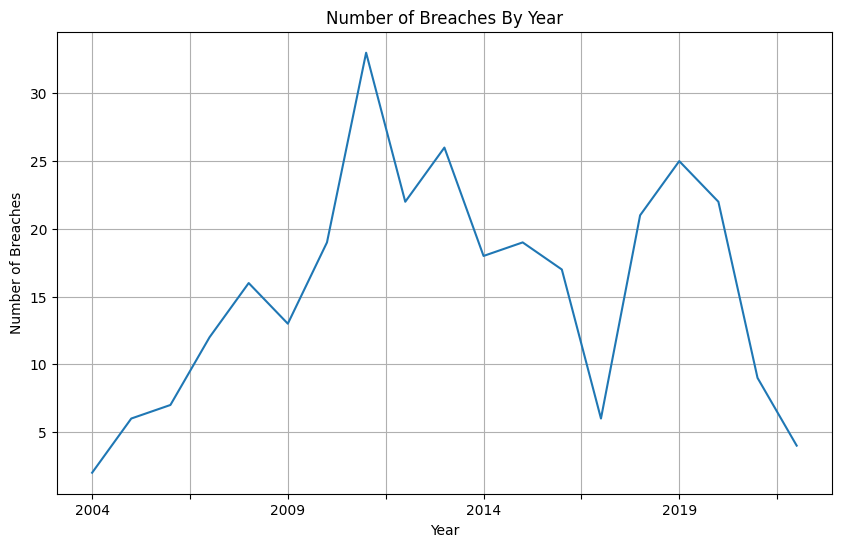

In [ ]:
import matplotlib.pyplot as plt
# line plot
# group by year and count breaches
breaches_by_year = df.groupby('year').size()

plt.figure(figsize=(10, 6))
breaches_by_year.plot(kind='line')
plt.title('Number of Breaches By Year')
plt.xlabel('Year')
plt.ylabel('Number of Breaches')
plt.grid(True)
plt.show()

###Most Targeted Organization Types

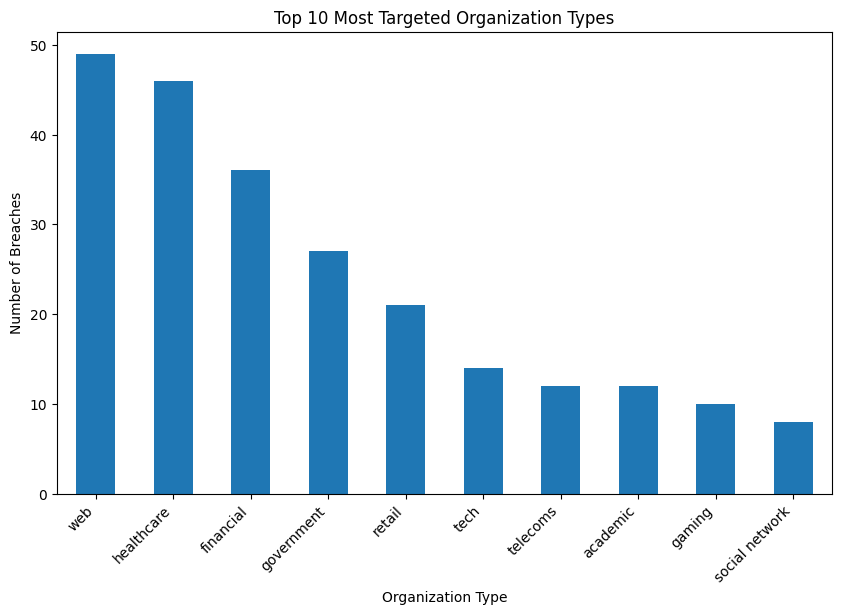

In [ ]:
# Plot top 10 organization types
# Bar Chart
top_ten_orgs = df['organization_type'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_ten_orgs.plot(kind='bar')
plt.title('Top 10 Most Targeted Organization Types')
plt.xlabel('Organization Type')
plt.ylabel('Number of Breaches')
plt.xticks(rotation=45, ha='right')
plt.show()

###Top 5 Breach Methods

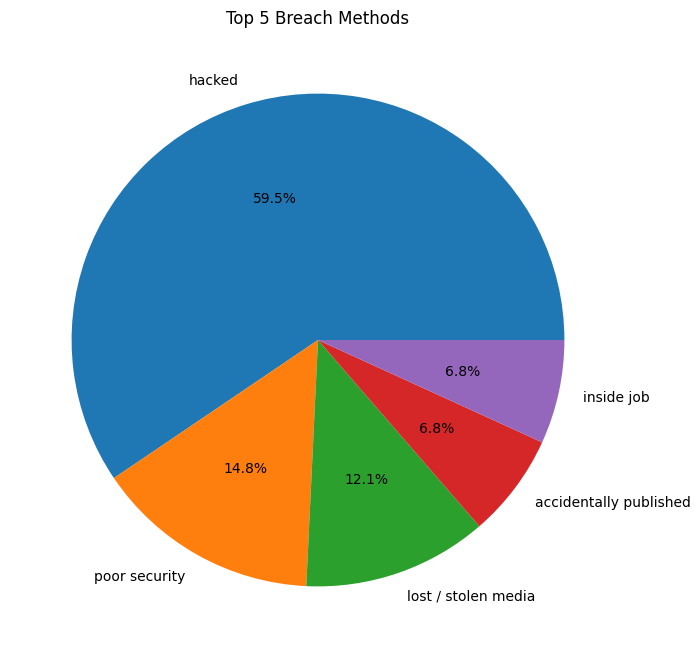

In [ ]:
# Get the top 5 breach methods
top_methods = df['method'].value_counts().head(5)

# Plot as pie chart
plt.figure(figsize=(8, 8))
top_methods.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Breach Methods')
plt.ylabel('')
plt.show()

###Largest Breaches

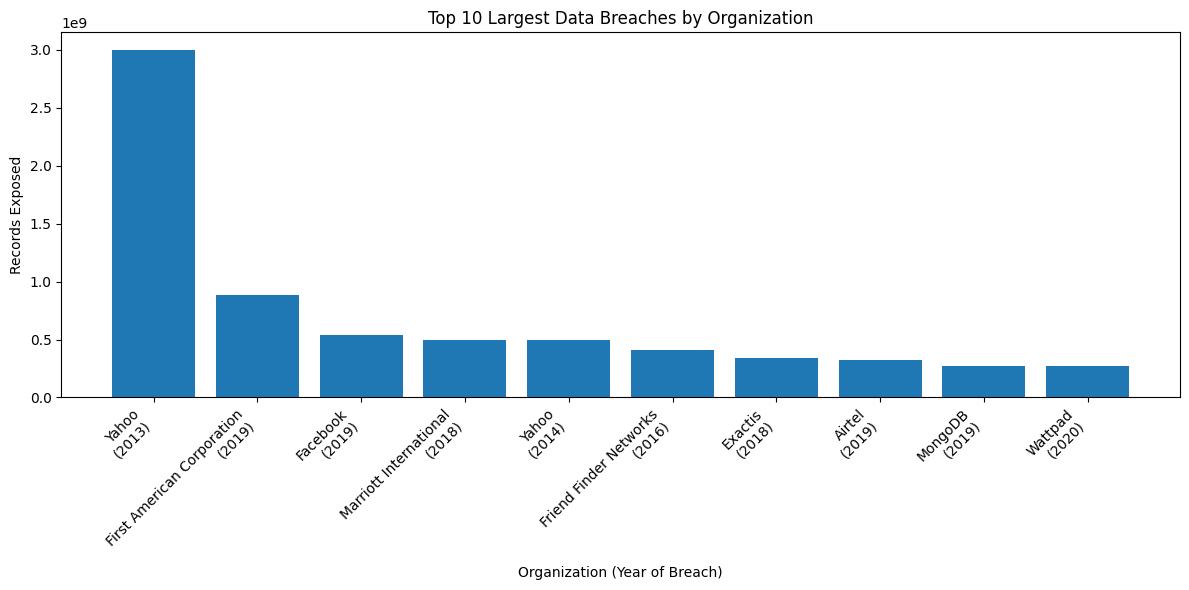

In [ ]:
#Largest Breaches

# Get top 10 breaches sorted by records
top_entities = df[['entity', 'records', 'year']].sort_values(by='records', ascending=False).head(10)

# Combine entity and year for x-axis
top_entities['label'] = top_entities['entity'] + '\n(' + top_entities['year'].astype(str) + ')'

# Plot
plt.figure(figsize=(12, 6))
plt.bar(top_entities['label'], top_entities['records'])
plt.title('Top 10 Largest Data Breaches by Organization')
plt.xlabel('Organization (Year of Breach)')
plt.ylabel('Records Exposed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##**Conclusions**
---

This analysis of data breaches provides a clear illustration of the evolving cybersecurity landscape. The most targeted organizations were typically those in the web, healthcare, financial, and government sectors—sectors that manage sensitive personal or financial data.

The top breach methods reveal a reliance on social engineering, hacking, and unintended disclosures, suggesting that both technological defenses and human error mitigation strategies must be prioritized. The largest breaches involved hundreds of millions of records, underscoring the massive potential impact of a single successful attack.

Overall, the data underscores the importance of proactive cybersecurity policies, continuous risk assessments, and user education to mitigate threats and protect sensitive information.